# p-Center Problem
The p-center problem, as a traditional discrete location selection problem, has been applied widely in logistics, emergency facility location selection, and other fields.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Description" data-toc-modified-id="Problem-Description-1">Problem Description</a></span><ul class="toc-item"><li><span><a href="#p-Center" data-toc-modified-id="p-Center-1.1">p-Center</a></span></li><li><span><a href="#Integer-programming-model:" data-toc-modified-id="Integer-programming-model:-1.2">Integer programming model:</a></span></li></ul></li><li><span><a href="#Setup" data-toc-modified-id="Setup-2">Setup</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-3">Example</a></span><ul class="toc-item"><li><span><a href="#Random-Data" data-toc-modified-id="Random-Data-3.1">Random Data</a></span></li><li><span><a href="#Road-Network-Data" data-toc-modified-id="Road-Network-Data-3.2">Road Network Data</a></span></li></ul></li></ul></div>

## Problem Description

### p-Center
It is assumed that there are a set of potential facilities points and a set of demand points. On the premise that the total number of facilities is fixed, determine where to build facilities and how to allocate demand points to facilities, so as to **minimize the sum of the maximum distance between demand points and allocated facilities.**

*Parameters*:
* **$I=1,...,n$** : Set of demand points
* **$J=1,...,m$** : Set of potential facility locations
* **$p$** : Number of facilities to be located

*Decision variables*:
$$x_{ij}=\begin{cases}1,&\text{if i is assigned to the facility j}\\ 0,&\text{otherwise}\end{cases}$$
$$y_j=\begin{cases}1,&\text{if and only if facility j is open}\\ 0,&\text{otherwise}\end{cases}$$


###  Integer programming model:
$$
\begin{array}{lll}
\text{Min} & \sum_{j=1}^{n}d_{ij}x_{ij} & (1) \\
\text{s.t.} & \sum_{j=1}^{n}y_j=p, & (2)\\
& \sum_{j=1}^{n}x_{ij}=1,i=1,...,n, & (3)\\
& x_{ij}≤y_{j},i=1,...n,j=1,...n, & (4)\\
& \sum_{j=1}^{n}d_{ij}x_{ij}≤z,i=1,...n, & (5)\\
& x_{ij}≤y_{j}∈\{0,1\},i=1,...n,j=1,...n. & (6)\\
\end{array}
$$


Equation (2) ensure that the number of open facilities is p. Constraints (3) assign each demand points to only one facility. Inequalities (4) guarantee each demand points must assign to a open facility. Constraints (5) require that $z$ is the upper bound of the distance between any demand points to the assigned facility. 
It is easy to see that $z=max_{i=1,...,n}\sum_{j=1}^n d_{ij}x_{ij}$ is the optimal cover radius.

## Setup

In [1]:
import random
from itertools import product
import numpy as np
import pandas as pd
import osmnx as ox

from location.PModel import *

In [2]:
np.random.seed(0)
# 求解器设置
solver_list = listSolvers(onlyAvailable=True)
print(solver_list)  # 可用求解器输出

No parameters matching '_test' found
['CPLEX_CMD', 'GUROBI', 'GUROBI_CMD', 'PULP_CBC_CMD']


## Example

### Random Data

In [3]:
num_points = 20
points = [(random.random(), random.random()) for i in range(num_points)]
num_located = 4  # P: number of located facility in the end
# num_people = np.random.randint(6, size=num_points)  # h
cartesian_prod = list(product(range(num_points), range(num_points)))
y, selected, selected_points, unselected_points  = PCenter(num_points=num_points,
                                                           cover=points,
                                                           num_located=num_located,
                                                           cartesian_prod=cartesian_prod,
                                                           solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [4, 11, 17, 18]
Assigned relationships =  [(0, 11), (1, 11), (2, 4), (3, 4), (4, 4), (5, 18), (6, 11), (7, 17), (8, 18), (9, 4), (10, 17), (11, 11), (12, 18), (13, 4), (14, 17), (15, 4), (16, 4), (17, 17), (18, 18), (19, 4)]
Minimum total distance =  3.1792240399538922


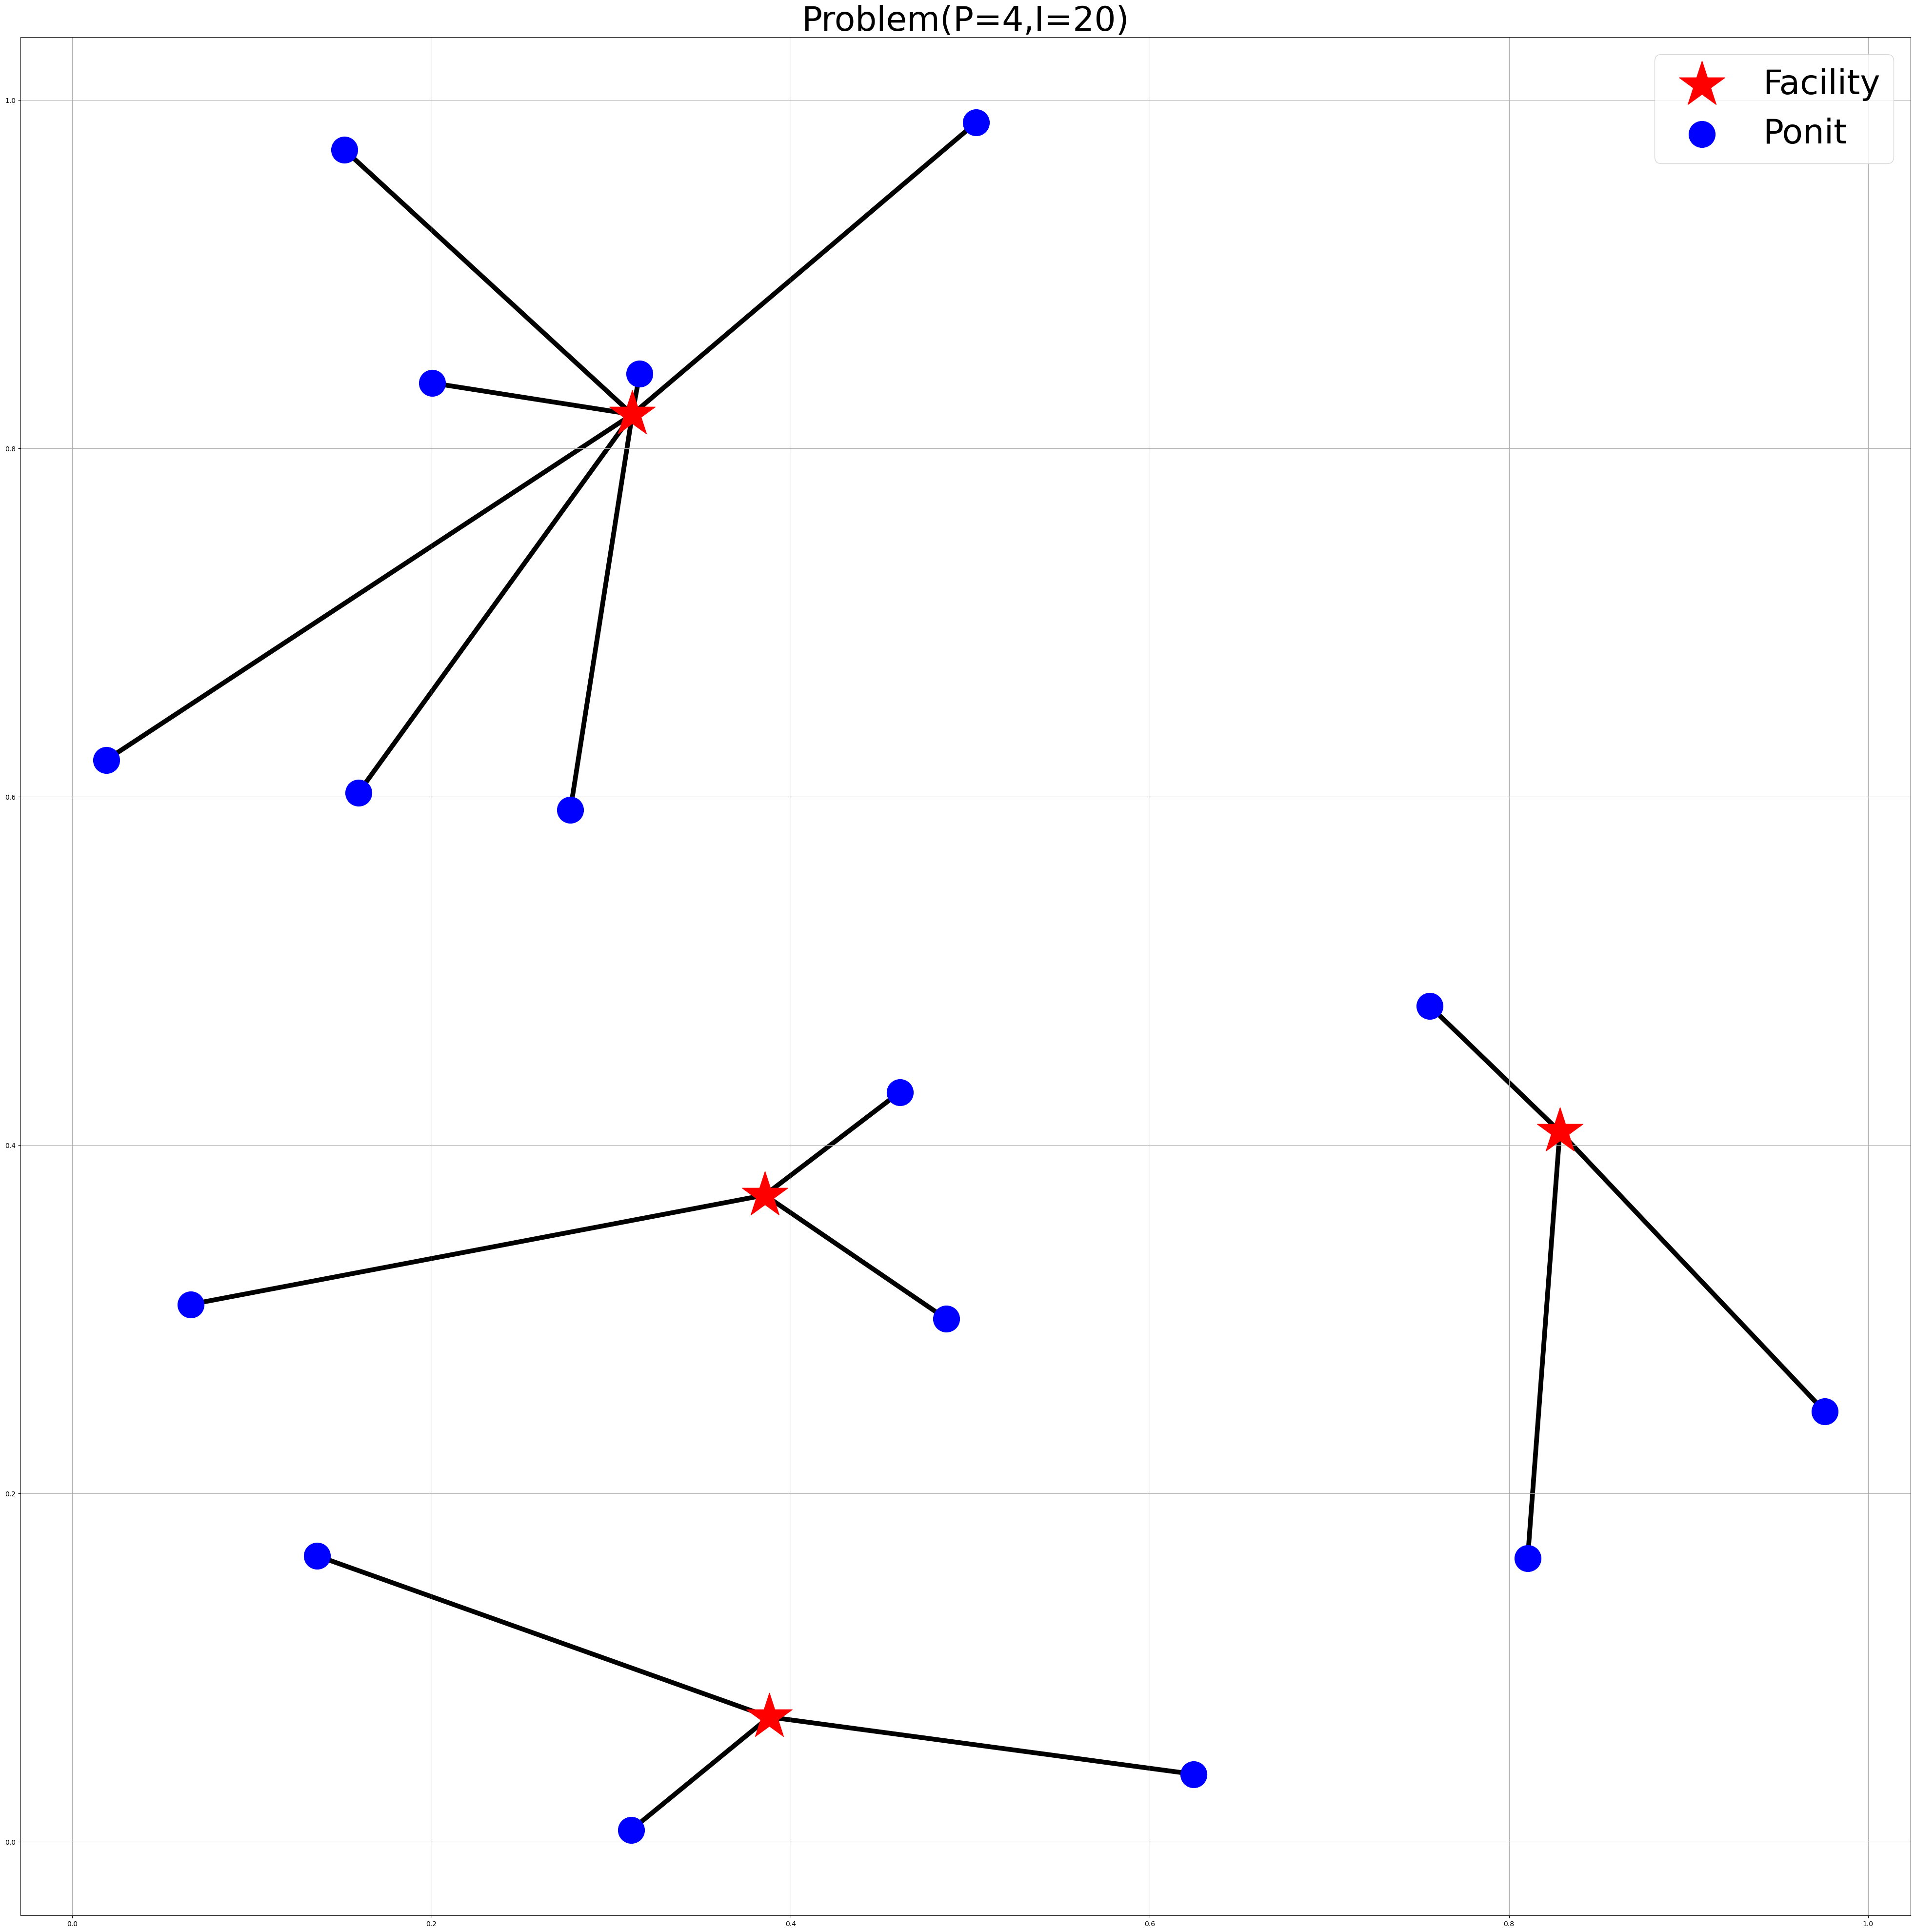

In [4]:
#Image representation
plt.figure(figsize=(50,50))
name = 'Problem(P=' + str(num_located) + ',I=' + str(num_points) + ')'
plt.title(name, fontsize = 50)
#Points
plt.scatter(*zip(*selected_points), c='Red', marker='*',s=5000,label = 'Facility',zorder=2)   
plt.scatter(*zip(*unselected_points), c='Blue', marker='o',s=1500, label = 'Ponit', zorder=3)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='Black', linewidth=7, zorder=1)


plt.grid(True)   
plt.legend(loc='best', fontsize = 50) 
plt.show()

### Road Network Data

In [5]:
df = pd.read_csv('../data/北京POI裁剪.csv',encoding='gbk')
df = df.query('adname=="东城区" | adname=="西城区" | adname=="朝阳区" | adname=="海淀区"').reset_index(drop=True)
data = df[['long', 'lat']]
num_points = df.shape[0]
num_located = 15
np.random.seed(0)
num_people = np.random.randint(1,2, size=num_points)
cartesian_prod = list(product(range(num_points), range(num_points)))
points = [(data['long'][i], data['lat'][i]) for i in range(num_points)]

In [6]:
y, selected, selected_points, unselected_points  = PMedian(num_points=num_points,
                                                          num_located=num_located,
                                                          cartesian_prod=cartesian_prod,
                                                          num_people=num_people,
                                                          cover=points,
                                                          solver=PULP_CBC_CMD()).prob_solve()

Status: Optimal
Selected positions = [7, 16, 17, 22, 27, 28, 42, 47, 48, 55, 63, 84, 86, 93, 100]
Assigned relationships =  [(0, 93), (1, 16), (2, 22), (3, 84), (4, 17), (5, 17), (6, 28), (7, 7), (8, 28), (9, 84), (10, 22), (11, 22), (12, 63), (13, 47), (14, 63), (15, 16), (16, 16), (17, 17), (18, 48), (19, 48), (20, 28), (21, 84), (22, 22), (23, 63), (24, 28), (25, 48), (26, 17), (27, 27), (28, 28), (29, 86), (30, 93), (31, 27), (32, 47), (33, 28), (34, 28), (35, 86), (36, 17), (37, 42), (38, 84), (39, 7), (40, 42), (41, 86), (42, 42), (43, 28), (44, 47), (45, 63), (46, 22), (47, 47), (48, 48), (49, 16), (50, 63), (51, 47), (52, 48), (53, 93), (54, 86), (55, 55), (56, 48), (57, 22), (58, 47), (59, 55), (60, 100), (61, 86), (62, 84), (63, 63), (64, 48), (65, 47), (66, 47), (67, 48), (68, 63), (69, 55), (70, 42), (71, 7), (72, 93), (73, 86), (74, 86), (75, 16), (76, 16), (77, 28), (78, 28), (79, 28), (80, 22), (81, 93), (82, 28), (83, 100), (84, 84), (85, 55), (86, 86), (87, 42), (88, 6

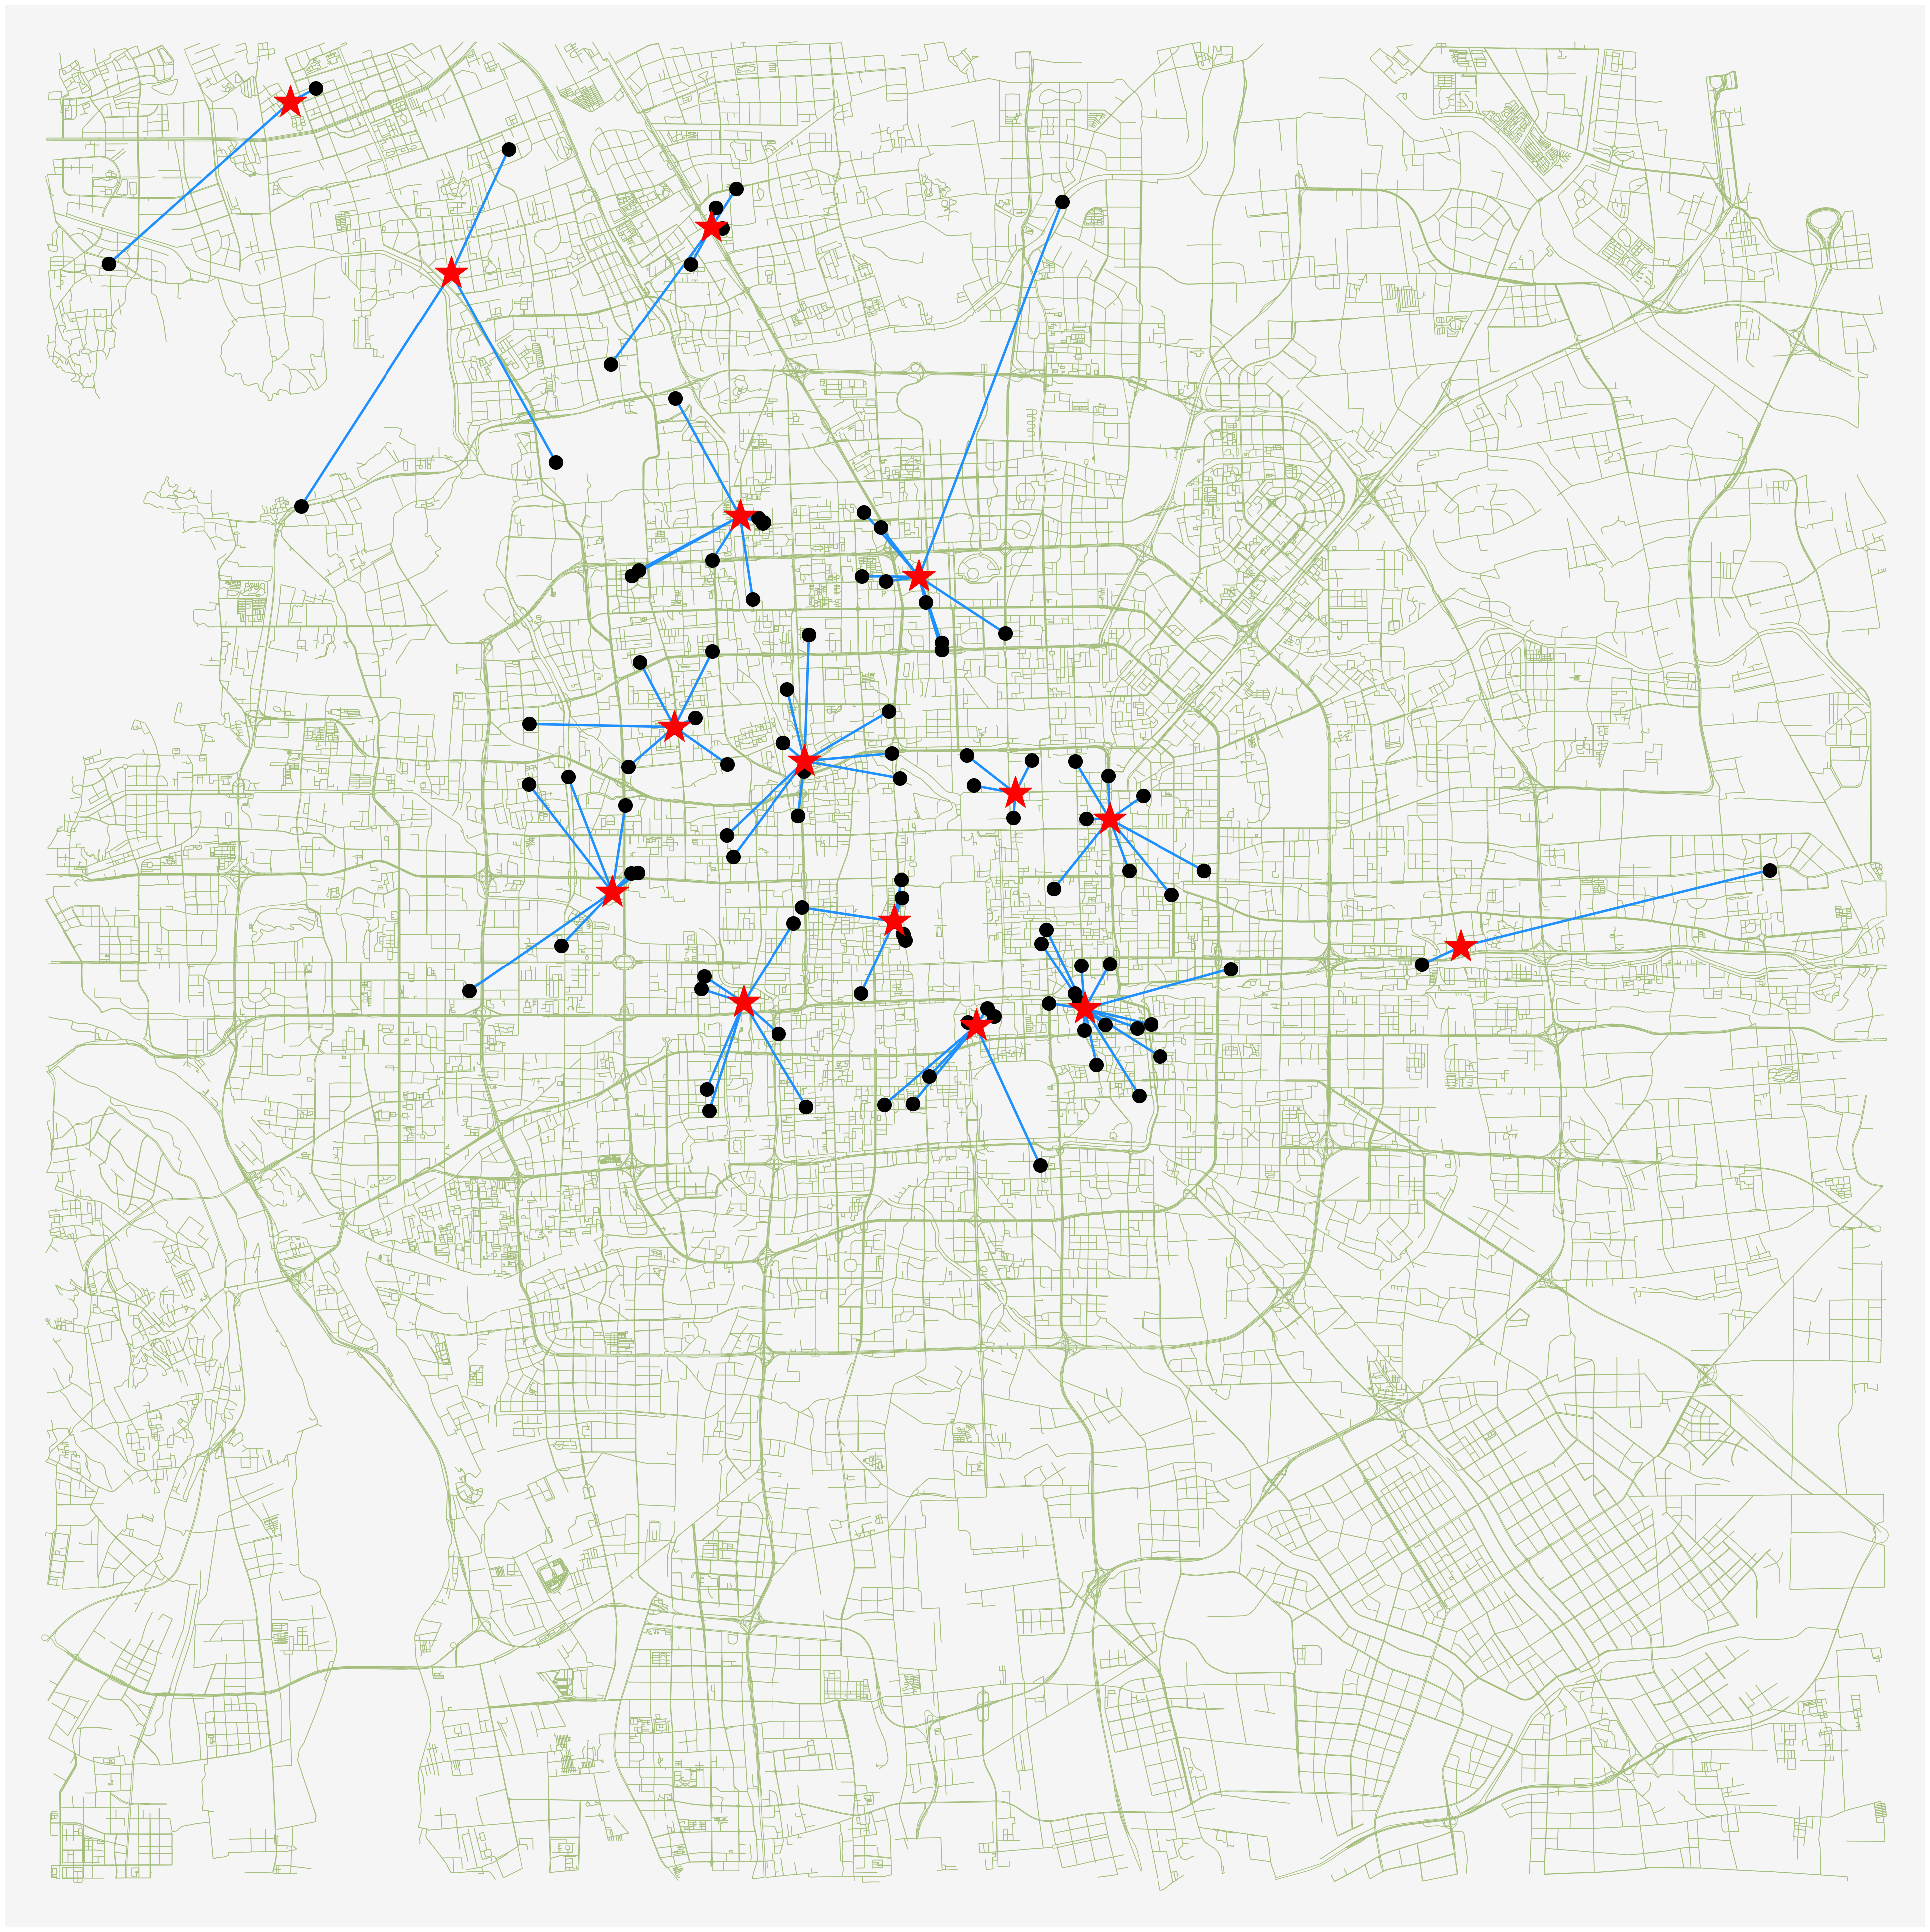

In [7]:
G = ox.load_graphml('..\data\Beijing.graphml')
ox.plot_graph(G, figsize=(50,50),bgcolor="#F5F5F5",node_size=0,edge_color = "#A4BE7B", show=False, close=False)
for j in range(num_points):
    if j in selected:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c='red',marker='*',markersize=50, zorder=3)
    else:
        lx = df['lat'][j]
        ly = df['long'][j]
        plt.plot(ly,lx,c="black",marker='o',markersize=20, zorder=2)
#Lines
for i in range(num_points):
    for j in range(num_points):
        if y[i][j].varValue == 1 :
            pts = [points[i], points[j]]
            plt.plot(*zip(*pts), c='#1E90FF', linewidth=3.5, zorder=1)